In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator

In [2]:
url='https://raw.githubusercontent.com/saahil-jain/Benchmarking_Of_NODE/master/Time%20Series%20Forecasting/datasets/data.csv'
covid_records = pd.read_csv(url,sep=",") 
covid_records

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
1,04/06/2020,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,03/06/2020,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,02/06/2020,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
21542,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
21543,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
21544,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
21545,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [3]:
list_of_countries=['United_Kingdom', 'Germany', 'Spain', 'Italy', 'United_States_of_America', 'India']

In [4]:
def gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, np.pow(error, 2)

CASES

In [5]:
grouped=covid_records.groupby('countriesAndTerritories')
country_population = {}
country_cases={}
for country in list_of_countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]
  list_cases=list(abs(covid_records["cases"].loc[covid_records["countriesAndTerritories"]==country]))[::-1]
  length=len(list_cases)
  flag =0
  for number in list_cases:
    if number==0:
      continue
    else:
      flag=list_cases.index(number)
      break
  list_cases=list_cases[flag::]
  normalised_list_cases=[]
  for i in list_cases:
    normalised_list_cases.append((i*1000000)/country_population[country])
  list_days=list(range(flag,length))
  country_cases[country]={"cases":normalised_list_cases,"days":list_days}

United_Kingdom
accuracy is 82.11115439177175
Root mean square error 8.55776934267165
R squared value 0.9196936947421511


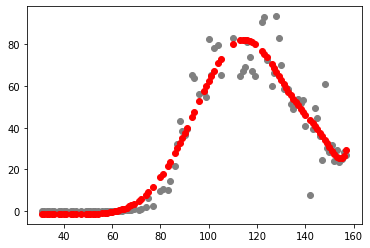

Germany
accuracy is 71.00056239085728
Root mean square error 9.876116057135775
R squared value 0.7977244336491487


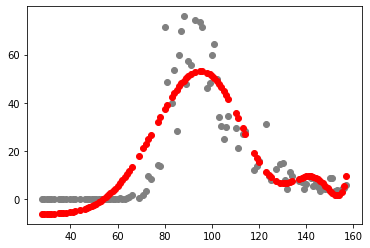

Spain
accuracy is 66.90953799479958
Root mean square error 22.978297588808143
R squared value 0.82285518921409


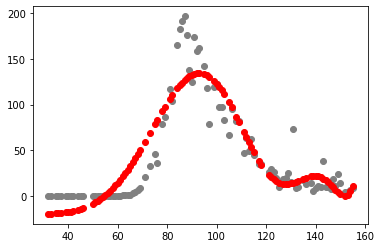

Italy
accuracy is 86.36040938259023
Root mean square error 9.539383596659274
R squared value 0.899167418518206


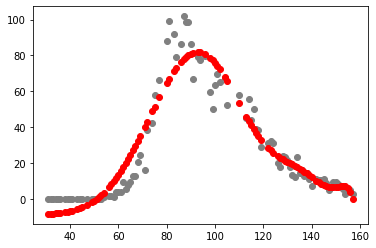

United_States_of_America
accuracy is 86.45217534165126
Root mean square error 10.566724724409118
R squared value 0.9287166430777342


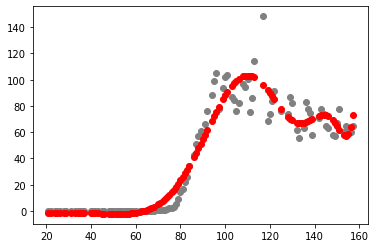

India
accuracy is 98.61733624446443
Root mean square error 0.1849544724924092
R squared value 0.9919078941135363


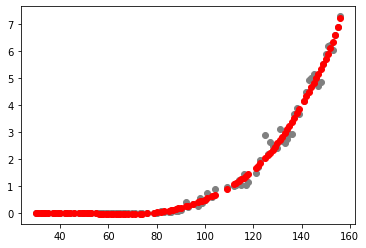

CPU times: user 933 ms, sys: 32.4 ms, total: 966 ms
Wall time: 985 ms


In [6]:
%%time
for country in list_of_countries:
  print(country)
  dict_cases=country_cases[country]
  df_current=pd.DataFrame(dict_cases,columns=["cases","days"])
  X=df_current["days"].values.reshape(-1,1)
  y=df_current["cases"].values.reshape(-1,1)
  X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)

  poly_reg_model = PolynomialFeatures(degree=14)
  X_poly_train=poly_reg_model.fit_transform(X_train)
  X_poly_test=poly_reg_model.fit_transform(X_test)
  lin_reg2=LinearRegression()
  lin_reg2.fit(X_poly_train,y_train)
  y_poly_pred=lin_reg2.predict(X_poly_train)
  rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
  r2 = r2_score(y_train,y_poly_pred)
  accuracy=lin_reg2.score(X_poly_test,y_test)
  print("accuracy is",accuracy*100)
  print("Root mean square error",rmse)
  print("R squared value",r2)

  plt.scatter(X_train, y_train,  color='gray')
  plt.scatter(X_train, y_poly_pred, color='red')
  plt.show() 


accuracy is 80.93949872641284
Root mean square error 16.376022238492812
R squared value 0.8093949872641284


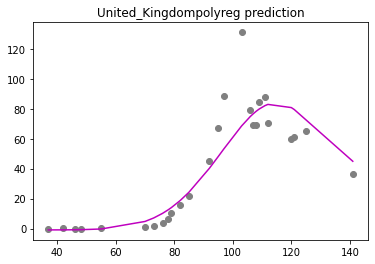

Root mean squared error 16.376022238492812
R squared value 0.8093949872641284


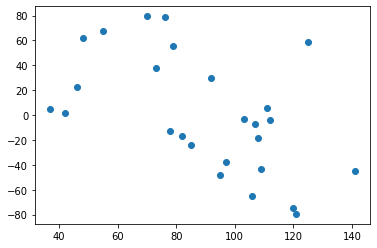

accuracy is 65.54932948888165
Root mean square error 11.829833350750073
R squared value 0.6554932948888166


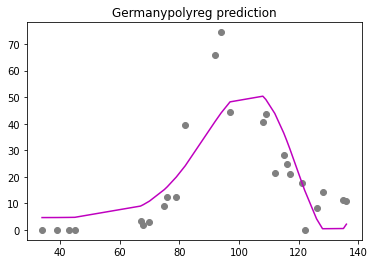

Root mean squared error 11.829833350750073
R squared value 0.6554932948888166


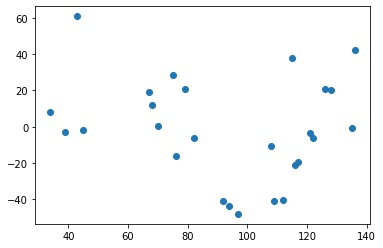

accuracy is 11.703285575923283
Root mean square error 39.08168051669495
R squared value 0.11703285575923283


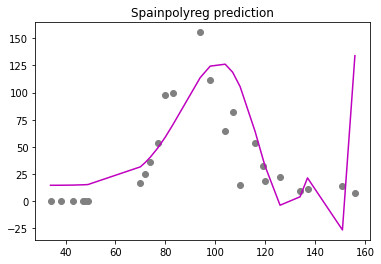

Root mean squared error 39.08168051669495
R squared value 0.11703285575923283


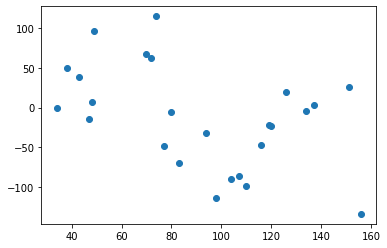

accuracy is 34.51235201859208
Root mean square error 23.706011705393486
R squared value 0.34512352018592085


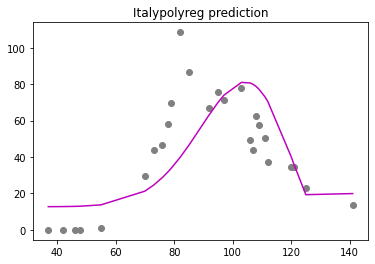

Root mean squared error 23.706011705393486
R squared value 0.34512352018592085


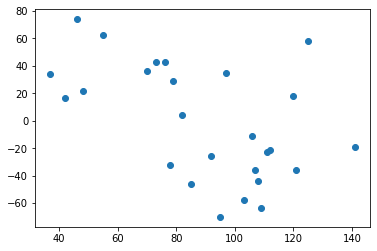

accuracy is 84.17962885815375
Root mean square error 15.570844068912445
R squared value 0.8417962885815375


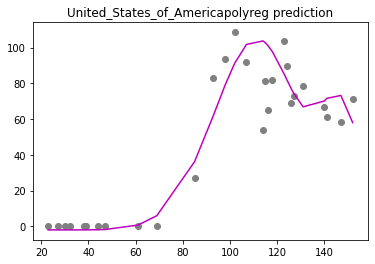

Root mean squared error 15.570844068912445
R squared value 0.8417962885815375


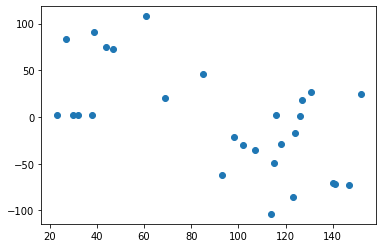

accuracy is 98.52817817227711
Root mean square error 0.10718032576169273
R squared value 0.985281781722771


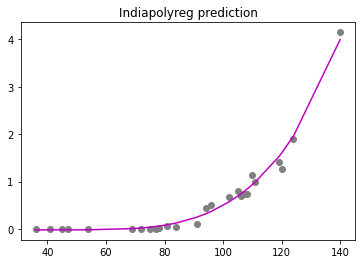

Root mean squared error 0.10718032576169273
R squared value 0.985281781722771


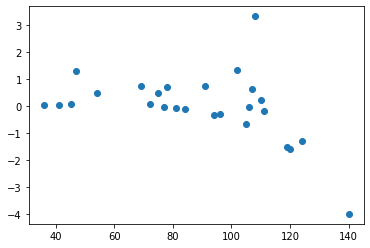

CPU times: user 1.85 s, sys: 66.2 ms, total: 1.91 s
Wall time: 1.88 s


In [7]:
%%time
for country in list_of_countries:
  residuals=0
  dict_cases=country_cases[country]
  df_current=pd.DataFrame(dict_cases,columns=["cases","days"])
  X=df_current["days"].values.reshape(-1,1)
  y=df_current["cases"].values.reshape(-1,1)
  X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)

  poly_reg_model = PolynomialFeatures(degree=16)
  X_poly_train=poly_reg_model.fit_transform(X_train)
  X_poly_test=poly_reg_model.fit_transform(X_test)
  lin_reg2=LinearRegression()

  lin_reg2.fit(X_poly_train,y_train)
  y_poly_pred=lin_reg2.predict(X_poly_test)
  df_comp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_poly_pred.flatten()})

  rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
  r2 = r2_score(y_test,y_poly_pred)
  accuracy=lin_reg2.score(X_poly_test,y_test)
  print("accuracy is",accuracy*100)
  print("Root mean square error",rmse)
  print("R squared value",r2)

  plt.scatter(X_test, y_test,  color='gray') 
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X_test,y_poly_pred), key=sort_axis)
  X_test, y_poly_pred = zip(*sorted_zip)
  plt.plot(X_test, y_poly_pred, color='m')
  plt.title(country+"polyreg prediction")
  plt.show()

  residuals=y_test-y_poly_pred
  print("Root mean squared error",rmse)
  print("R squared value",r2)
  plt.plot(X_test,residuals,'o')
  plt.show()

DEATHS

In [8]:
grouped=covid_records.groupby('countriesAndTerritories')
country_population = {}
country_deaths={}
for country in list_of_countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]
  list_deaths=list(abs(covid_records["deaths"].loc[covid_records["countriesAndTerritories"]==country]))[::-1]
  length=len(list_deaths)
  flag =0
  for number in list_deaths:
    if number==0:
      continue
    else:
      flag=list_deaths.index(number)
      break
  list_deaths=list_deaths[flag::]
  normalised_list_deaths=[]
  for i in list_deaths:
    normalised_list_deaths.append((i*1000000)/country_population[country])
  list_days=list(range(flag,length))
  country_deaths[country]={"deaths":normalised_list_deaths,"days":list_days}

United_Kingdom
accuracy is 65.86040360601955
Root mean square error 2.426933503839345
R squared value 0.7692041612847267


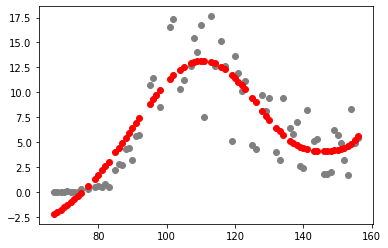

Germany
accuracy is 74.09021909202929
Root mean square error 0.5487260867575396
R squared value 0.7197694423735382


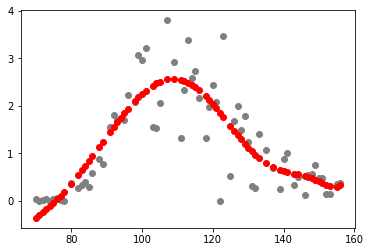

Spain
accuracy is -2.9753183676895834
Root mean square error 4.940262221779155
R squared value 0.5606750854086965


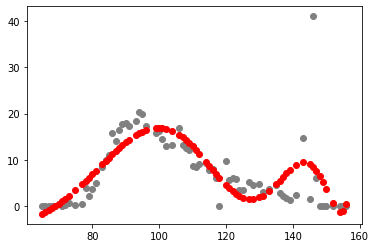

Italy
accuracy is 72.87450214089407
Root mean square error 1.9699503229149937
R squared value 0.7906591425748828


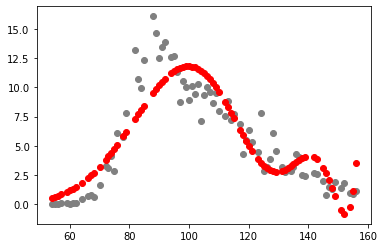

United_States_of_America
accuracy is 72.75854072129148
Root mean square error 1.5120869456324526
R squared value 0.6987822383803881


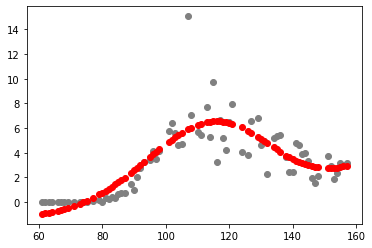

India
accuracy is 95.92503813535446
Root mean square error 0.013817914927245791
R squared value 0.9394864572461058


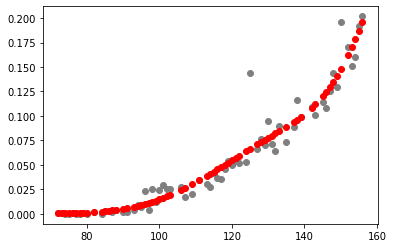

CPU times: user 919 ms, sys: 31 ms, total: 950 ms
Wall time: 937 ms


In [9]:
%%time
for country in list_of_countries:
  print(country)
  dict_deaths=country_deaths[country]
  df_current=pd.DataFrame(dict_deaths,columns=["deaths","days"])
  X=df_current["days"].values.reshape(-1,1)
  y=df_current["deaths"].values.reshape(-1,1)
  X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)

  poly_reg_model = PolynomialFeatures(degree=14)
  X_poly_train=poly_reg_model.fit_transform(X_train)
  X_poly_test=poly_reg_model.fit_transform(X_test)
  lin_reg2=LinearRegression()
  lin_reg2.fit(X_poly_train,y_train)
  y_poly_pred=lin_reg2.predict(X_poly_train)
  rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
  r2 = r2_score(y_train,y_poly_pred)
  accuracy=lin_reg2.score(X_poly_test,y_test)
  print("accuracy is",accuracy*100)
  print("Root mean square error",rmse)
  print("R squared value",r2)

  plt.scatter(X_train, y_train,  color='gray')
  plt.scatter(X_train, y_poly_pred, color='red')
  plt.show() 


accuracy is 53.14966330432039
Root mean square error 3.323292734317129
R squared value 0.5314966330432039


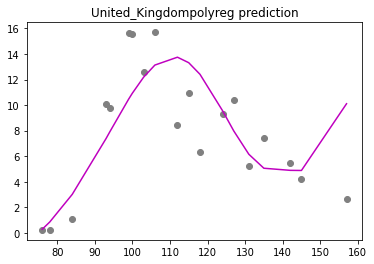

Root mean squared error 3.323292734317129
R squared value 0.5314966330432039


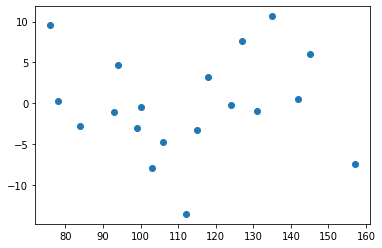

accuracy is 73.50976430630192
Root mean square error 0.5364009138197448
R squared value 0.7350976430630192


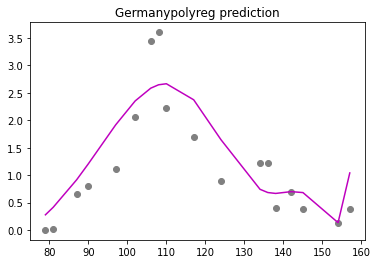

Root mean squared error 0.5364009138197448
R squared value 0.7350976430630192


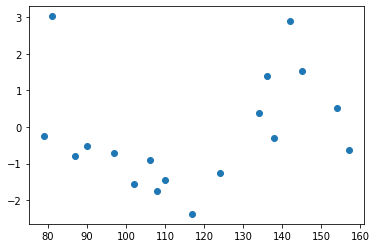

accuracy is -26.195745044987785
Root mean square error 6.61564022757035
R squared value -0.26195745044987784


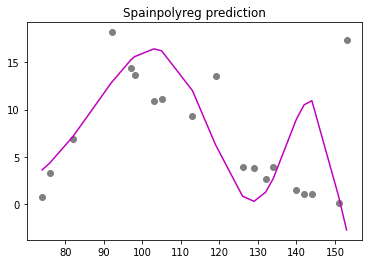

Root mean squared error 6.61564022757035
R squared value -0.26195745044987784


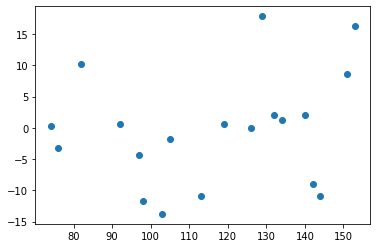

accuracy is 42.78523286015117
Root mean square error 2.910901259934461
R squared value 0.4278523286015117


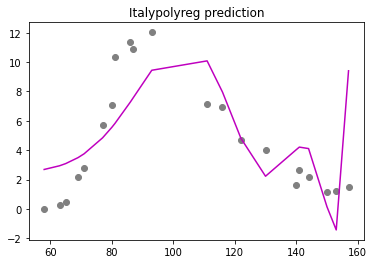

Root mean squared error 2.910901259934461
R squared value 0.4278523286015117


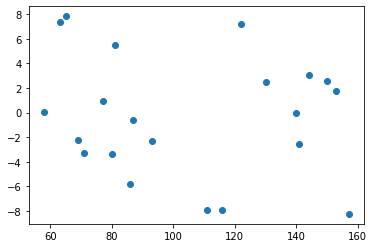

accuracy is 74.81527506222486
Root mean square error 1.5381417060171045
R squared value 0.7481527506222485


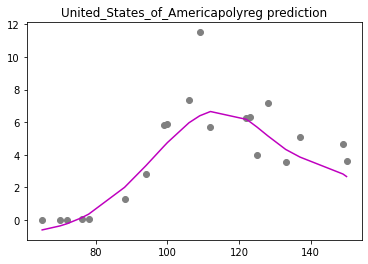

Root mean squared error 1.5381417060171045
R squared value 0.7481527506222485


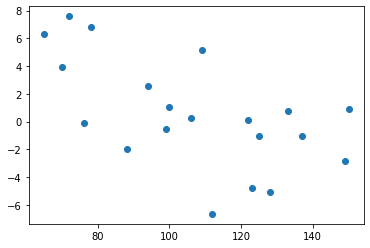

accuracy is 96.00131074078475
Root mean square error 0.00875217719403251
R squared value 0.9600131074078474


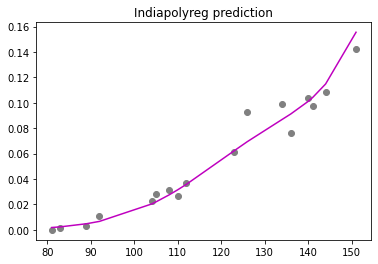

Root mean squared error 0.00875217719403251
R squared value 0.9600131074078474


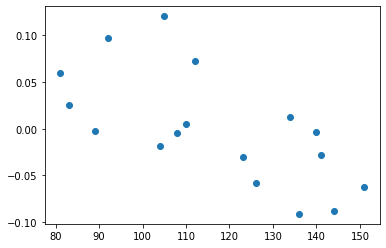

CPU times: user 1.91 s, sys: 66.9 ms, total: 1.98 s
Wall time: 1.93 s


In [10]:
%%time
for country in list_of_countries:
  residuals=0
  dict_deaths=country_deaths[country]
  df_current=pd.DataFrame(dict_deaths,columns=["deaths","days"])
  X=df_current["days"].values.reshape(-1,1)
  y=df_current["deaths"].values.reshape(-1,1)
  X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)

  poly_reg_model = PolynomialFeatures(degree=16)
  X_poly_train=poly_reg_model.fit_transform(X_train)
  X_poly_test=poly_reg_model.fit_transform(X_test)
  lin_reg2=LinearRegression()

  lin_reg2.fit(X_poly_train,y_train)
  y_poly_pred=lin_reg2.predict(X_poly_test)
  df_comp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_poly_pred.flatten()})

  rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
  r2 = r2_score(y_test,y_poly_pred)
  accuracy=lin_reg2.score(X_poly_test,y_test)
  print("accuracy is",accuracy*100)
  print("Root mean square error",rmse)
  print("R squared value",r2)

  plt.scatter(X_test, y_test,  color='gray') 
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X_test,y_poly_pred), key=sort_axis)
  X_test, y_poly_pred = zip(*sorted_zip)
  plt.plot(X_test, y_poly_pred, color='m')
  plt.title(country+"polyreg prediction")
  plt.show()

  residuals=y_test-y_poly_pred
  print("Root mean squared error",rmse)
  print("R squared value",r2)
  plt.plot(X_test,residuals,'o')
  plt.show()